# Figure 1

## a

In [1]:
%load_ext autoreload
%autoreload 2

from flyvis import EnsembleView

In [2]:
ensemble = EnsembleView("flow/0000")

Loading ensemble:   0%|          | 0/50 [00:00<?, ?it/s]

[2024-12-08 19:41:51] ensemble:166 Loaded 50 networks.


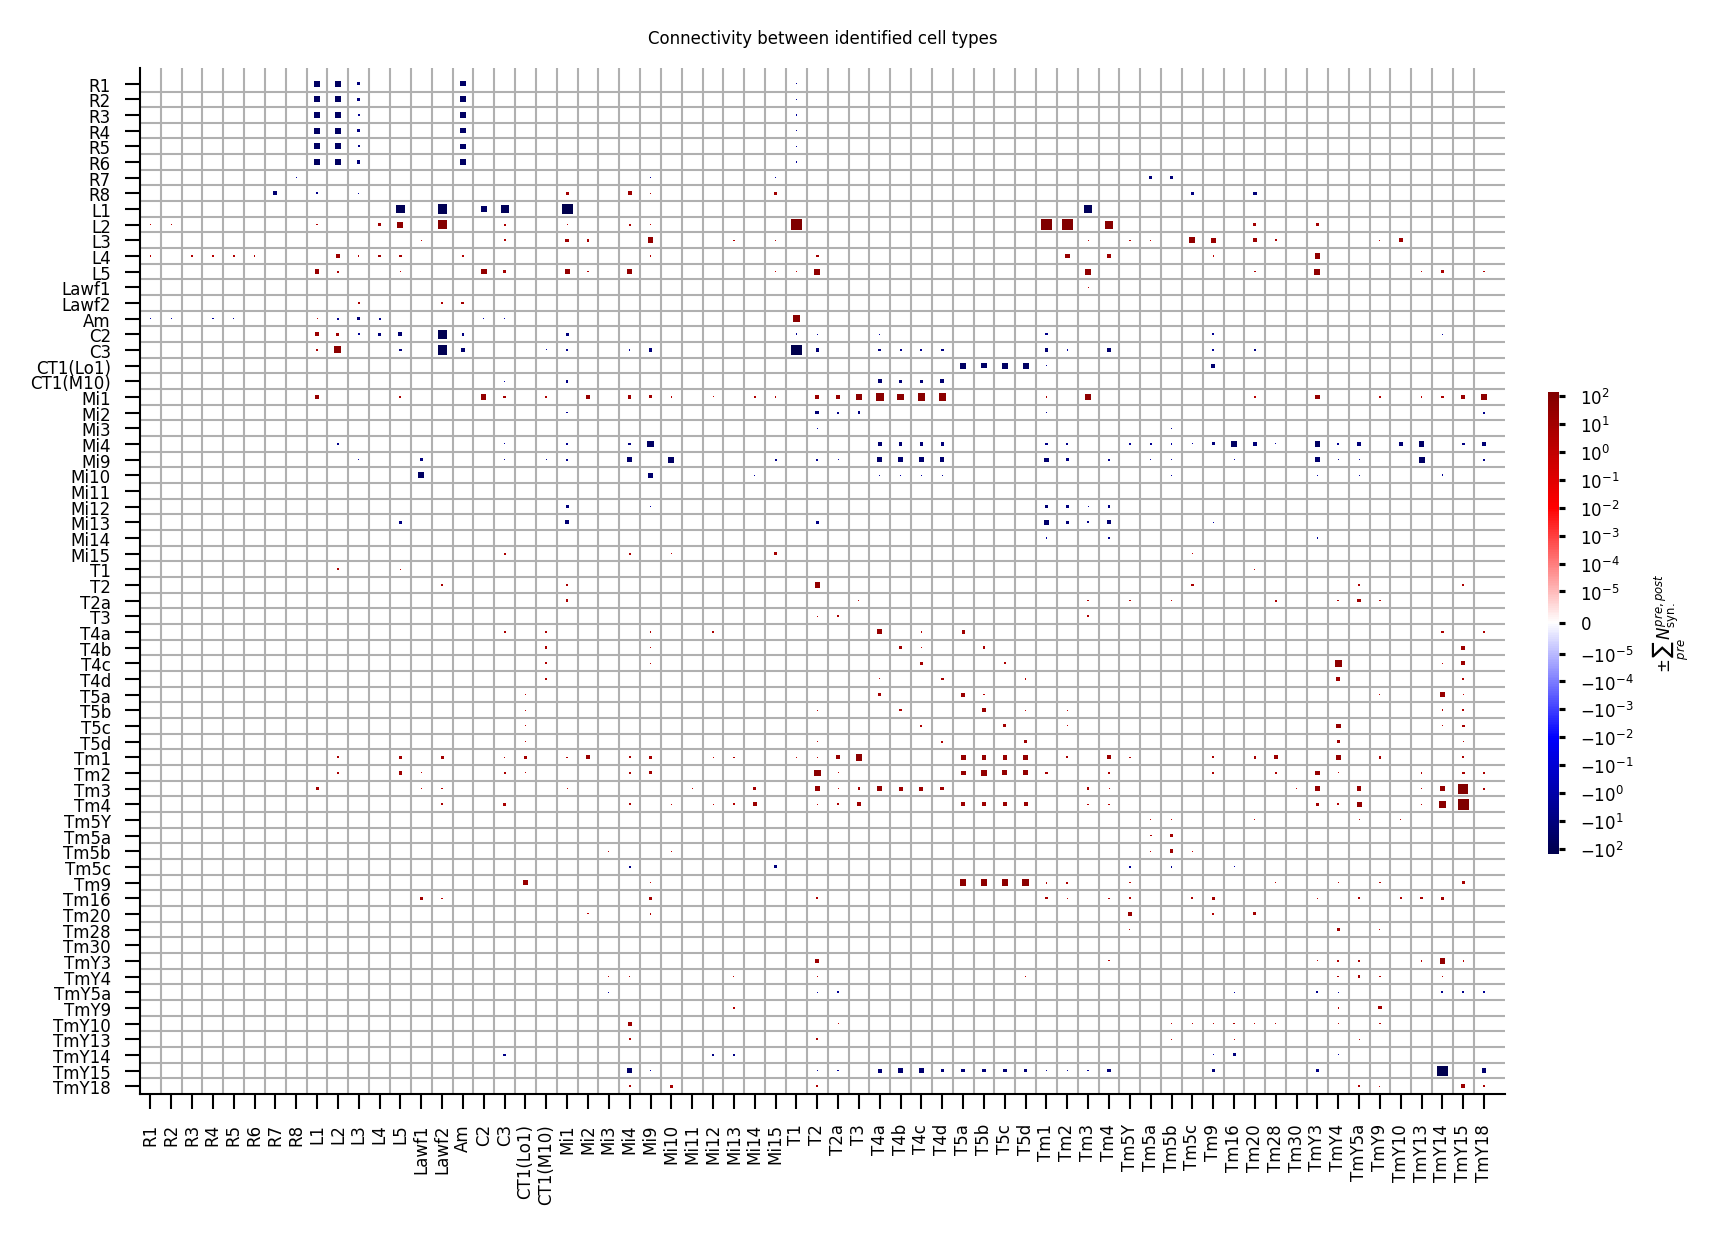

In [3]:
fig, ax, cbar, matrix = ensemble[0].connectivity_matrix()

## e

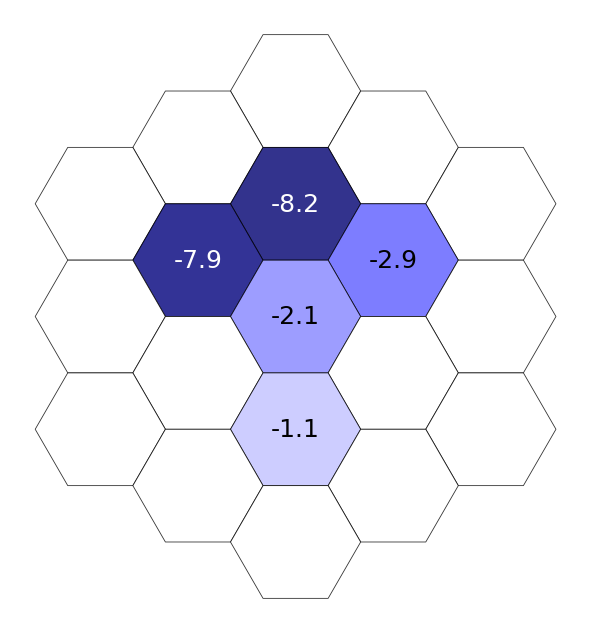

In [4]:
fig = ensemble[0].receptive_field(
    source="Mi9",
    target="T4d",
    annotate=True,
    annotate_coords=False,
    trained=False,
    n_syn=True,
    cbar=False,
    fontsize=6,
    vmax=14,
    figsize=[2, 2],
    title="",
    max_extent=2,
    edgewidth=0.2,
)

## g

In [5]:
import matplotlib.pyplot as plt

from flyvis.datasets.sintel import MultiTaskSintel
from flyvis.analysis.visualization.plots import hex_scatter, quick_hex_scatter
from flyvis.analysis.visualization.plt_utils import rm_spines

In [6]:
dataset = MultiTaskSintel(dt=1 / 24)
sequence = dataset.cartesian_sequence(0, outwidth=436)

[2024-12-08 19:41:59] sintel_utils:331 Found Sintel at /groups/turaga/home/lappalainenj/FlyVis/private/flyvision/data/SintelDataSet


sintel movie

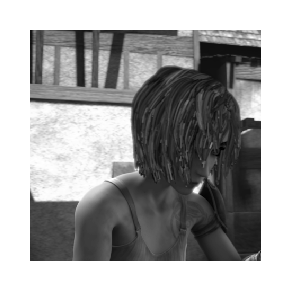

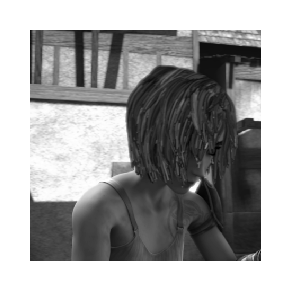

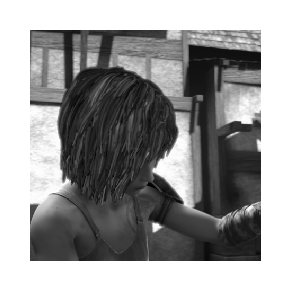

In [7]:
for frame in [0, 1, 18]:
    fig, ax = plt.subplots(figsize=[1, 1])
    ax.imshow(sequence[1, frame], cmap=plt.cm.binary_r)
    rm_spines(ax)

In [8]:
dataset.augment = False

In [9]:
sequence = dataset[1]

fly eye rendering

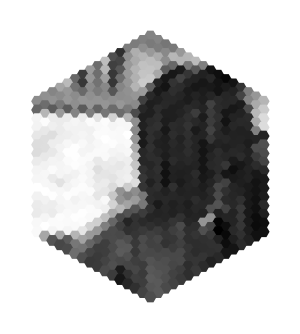

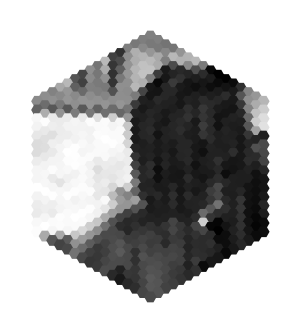

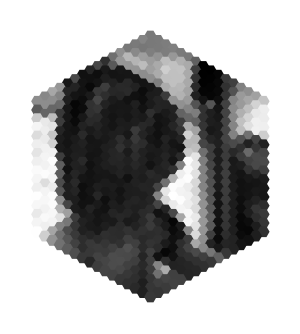

In [10]:
for frame in [0, 1, -1]:
    quick_hex_scatter(sequence["lum"][frame, 0], cbar=False)
    rm_spines(ax)

activations

In [11]:
from flyvis.connectome import ConnectomeFromAvgFilters
from flyvis.analysis.visualization import plt_utils
from flyvis.analysis.visualization.network_fig import WholeNetworkFigure
from flyvis.utils.color_utils import cell_type_colors

In [12]:
sequence = dataset[1]

In [13]:
ctome = ConnectomeFromAvgFilters()

In [14]:
nodes = ctome.nodes.to_df()

In [15]:
responses = (
    ensemble[0]
    .init_network()
    .simulate(sequence["lum"][None], dt=1 / 50, as_layer_activity=True)
)

[2024-12-08 19:42:18] network:222 Initialized network with NumberOfParams(free=734, fixed=2959) parameters.
[2024-12-08 19:42:18] chkpt_utils:36 Recovered network state.


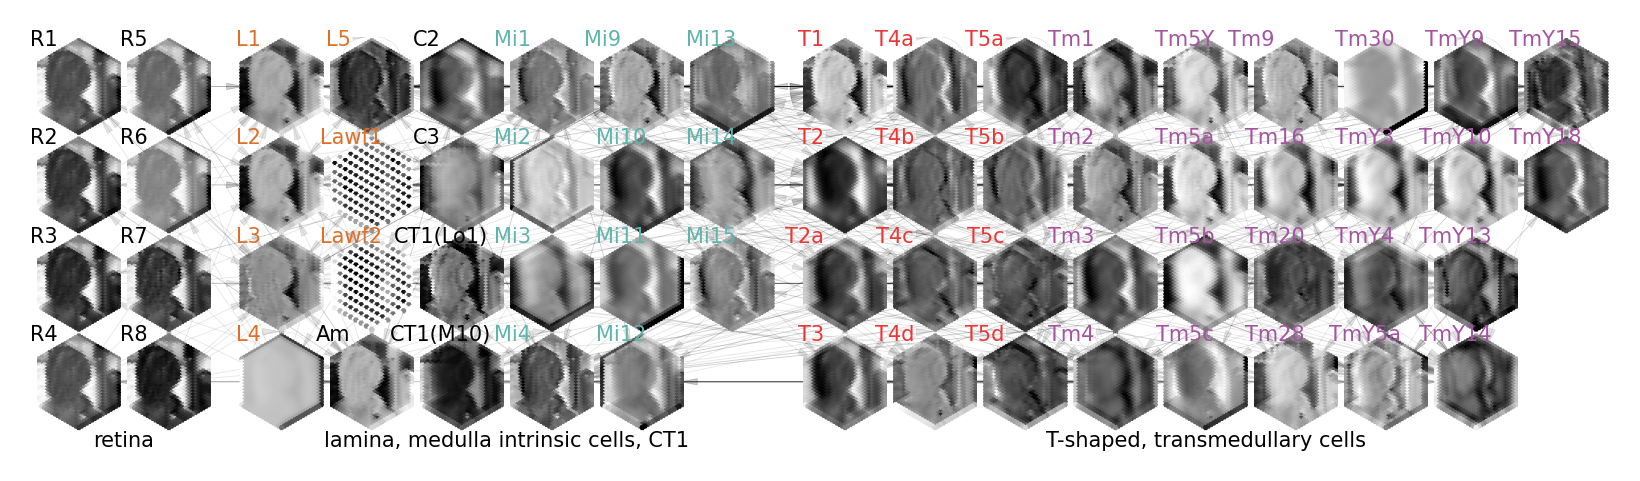

In [16]:
frame = -1
wnf = WholeNetworkFigure(ctome)
wnf.init_figure(
    figsize=(5.250, 1.3125),
    decoder_box=False,
    cell_type_labels=False,
    fontsize=5,
    add_graph_kwargs={
        "constant_edge_width": 0.2,
        "edge_width": 0.15,  # this scales edges relative to each other
        "constant_edge_color": "k",
        "edge_alpha": 0.1,
        "nx_kwargs": {
            "min_source_margin": 0,
            "min_target_margin": 5,
            "selfloop_x0": 0,
            "selfloop_y0": 0,
            "selfloop_h_shift": 0.025,
            "selfloop_v_shift": 0.1275,
        },
    },
    network_layout_axes_kwargs={
        "types_per_column": 4,
        "region_spacing": 1.25,
        "wspace": 0.0,
    },
)

for i, cell_type in enumerate(wnf.layout.keys()):
    ax = wnf.axes[i]
    u = nodes[nodes.type == cell_type].u.values
    v = nodes[nodes.type == cell_type].v.values
    hex_scatter(
        u,
        v,
        responses[cell_type][0, frame],
        fig=wnf.fig,
        ax=ax,
        label=f"{cell_type}",
        label_color=cell_type_colors[cell_type],
        cmap=plt.cm.binary_r,
        cbar=False,
        fontsize=5,
        fill=True,
        labelxy="auto",
    )
    (xmin, ymin, xmax, ymax) = ax.dataLim.extents
    ax.set_xlim(plt_utils.get_lims((xmin, xmax), 0.01))
    ax.set_ylim(plt_utils.get_lims((ymin, ymax), 0.02))

optic flow

In [17]:
from flyvis.analysis.visualization.plots import quick_hex_flow

In [18]:
sequence = dataset[1]

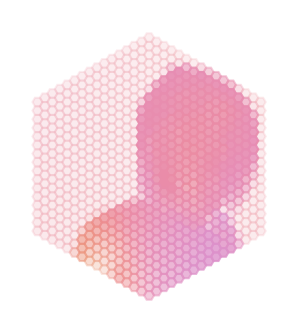

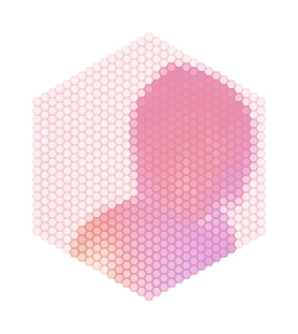

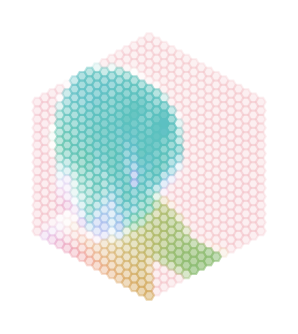

In [19]:
for frame in [0, 1, -1]:
    quick_hex_flow(
        sequence["flow"][frame],
        cwheel=False,
        cwheelradius=0.2,
        cwheelpos="southeast",
        cwheellabelpad=-3,
    )